In [18]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv")

In [20]:
df = df.drop(['Unnamed: 0'], axis=1)

In [21]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


In [30]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/xgb_dataset.csv")


In [31]:
# To improve accuracy of Model
df["freight_cost"] = df["freight_cost"] + 500


In [32]:
df.isnull().sum()

country               0
fulfill_via           0
vendor                0
shipment_mode         0
unit_of_measure       0
line_item_quantity    0
line_item_value       0
pack_price            0
unit_price            0
weight                0
freight_cost          0
location              0
distance              0
dtype: int64

In [33]:
df.shape

(6253, 13)

In [34]:
accuracy_data = {'Operation':["Original",'Subtract', 'Subtract', 'Add', 'Add'],
                 'Value' :[0,500,1000,500,1000],
        'Accuracy %':[64, 65, 66, 63,62]}
accuracy_data = pd.DataFrame(accuracy_data)
accuracy_data

,Operation,Value,Accuracy %
0,Original,0,64
1,Subtract,500,65
2,Subtract,1000,66
3,Add,500,63
4,Add,1000,62


In [35]:
df.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4021,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,15507,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,44950,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,5420,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,5712,India,5659


In [36]:
#Preapare X and y variables
X = df.drop(columns=['freight_cost'],axis=1)

In [37]:
X.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,India,5659


In [38]:
y = df['freight_cost']


In [ ]:
x

In [45]:
y

0        4021
1       15507
2       44950
3        5420
4        5712
        ...  
6248     9681
6249     9681
6250     9681
6251     9681
6252     9681
Name: freight_cost, Length: 6253, dtype: int64

In [40]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [41]:
X = preprocessor.fit_transform(X)
X.shape

(6253, 46)

In [42]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((5002, 46), (1251, 46))

In [44]:
print(X_train)
print(X_test)

  (0, 6)	1.0
  (0, 12)	1.0
  (0, 16)	1.0
  (0, 20)	1.0
  (0, 33)	1.0
  (0, 39)	-0.22913946552835396
  (0, 40)	-0.4784107915970618
  (0, 41)	-0.40372367269707177
  (0, 42)	0.27758959871307193
  (0, 43)	0.32750296506115434
  (0, 44)	-0.007194158861147626
  (0, 45)	0.27487000276592854
  (1, 4)	1.0
  (1, 13)	1.0
  (1, 19)	1.0
  (1, 21)	1.0
  (1, 33)	1.0
  (1, 39)	0.5847870334673841
  (1, 40)	0.5224801059125763
  (1, 41)	2.0728210785545267
  (1, 42)	0.3618829048879378
  (1, 43)	-0.1612191625347182
  (1, 44)	-0.007194158861147626
  (1, 45)	0.10643543158050209
  (2, 4)	1.0
  :	:
  (4999, 45)	-0.6356697199235425
  (5000, 4)	1.0
  (5000, 13)	1.0
  (5000, 19)	1.0
  (5000, 20)	1.0
  (5000, 33)	1.0
  (5000, 39)	0.1778237839695151
  (5000, 40)	-0.34421180337065155
  (5000, 41)	-0.32325451885939044
  (5000, 42)	-0.2281702383361235
  (5000, 43)	-0.4870339142652998
  (5000, 44)	-0.5791135642509851
  (5000, 45)	0.10643543158050209
  (5001, 4)	1.0
  (5001, 13)	1.0
  (5001, 19)	1.0
  (5001, 20)	1.0
  (50

In [204]:
print(X_test)

  (0, 1)	1.0
  (0, 13)	1.0
  (0, 20)	1.0
  (0, 24)	1.0
  (0, 27)	1.0
  (0, 40)	-0.6362296957074335
  (0, 41)	-0.2704262737714659
  (0, 42)	-0.13857697449062675
  (0, 43)	-0.06002166441506087
  (0, 44)	0.5226902885058725
  (0, 45)	-0.007088698760844203
  (0, 46)	0.4789818857926389
  (1, 2)	1.0
  (1, 12)	1.0
  (1, 18)	1.0
  (1, 21)	1.0
  (1, 34)	1.0
  (1, 40)	-0.2292450331117857
  (1, 41)	-0.03127951296404272
  (1, 42)	-0.010151563097650352
  (1, 43)	-0.18638235424398497
  (1, 44)	-0.32433666630032737
  (1, 45)	-0.1440511674785775
  (1, 46)	2.7087464442714877
  (2, 8)	1.0
  :	:
  (1248, 46)	-0.1428161103025249
  (1249, 11)	1.0
  (1249, 13)	1.0
  (1249, 20)	1.0
  (1249, 24)	1.0
  (1249, 34)	1.0
  (1249, 40)	-0.2292450331117857
  (1249, 41)	0.33013473815792505
  (1249, 42)	0.20308271336196201
  (1249, 43)	-0.2706228141299344
  (1249, 44)	-0.38949258590080427
  (1249, 45)	-0.2561937179233882
  (1249, 46)	-0.1428161103025249
  (1250, 6)	1.0
  (1250, 12)	1.0
  (1250, 16)	1.0
  (1250, 24)	1.0


In [205]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [206]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9256.0593
- Mean Absolute Error: 4485.5344
- R2 Score: 0.3270
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9615.8347
- Mean Absolute Error: 4405.4937
- R2 Score: 0.0319


Lasso
Model performance for Training set
- Root Mean Squared Error: 9256.9906
- Mean Absolute Error: 4485.7619
- R2 Score: 0.3269
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9612.9087
- Mean Absolute Error: 4397.3133
- R2 Score: 0.0325


Ridge
Model performance for Training set
- Root Mean Squared Error: 9256.5928
- Mean Absolute Error: 4487.1074
- R2 Score: 0.3270
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9612.3006
- Mean Absolute Error: 4403.4052
- R2 Score: 0.0326


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7039.3919
- Mean Absolute Error: 2881.2443


In [207]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.631274
6,XGBRegressor,0.546001
5,Random Forest Regressor,0.518626
3,K-Neighbors Regressor,0.365304
4,Decision Tree,0.244656
8,AdaBoost Regressor,0.067271
2,Ridge,0.032641
1,Lasso,0.032518
0,Linear Regression,0.031929


In [208]:
#XGBRegressor
CatBoosting_Regressor = CatBoostRegressor(verbose=False)
CatBoosting_Regressor = CatBoosting_Regressor.fit(X_train, y_train)
y_pred = CatBoosting_Regressor.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 63.13


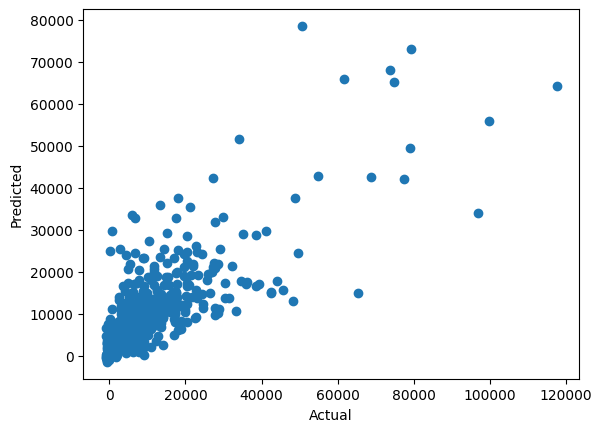

In [209]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

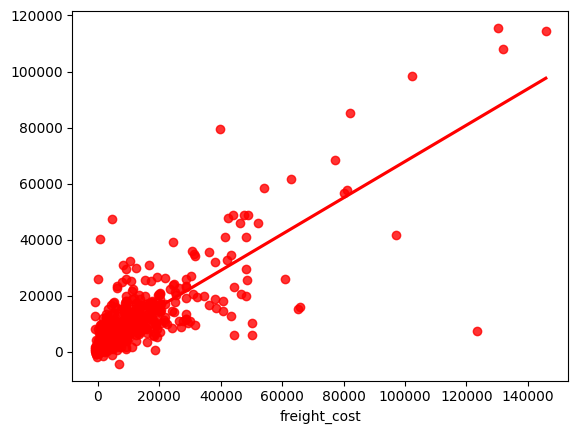

In [41]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [42]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3107,332,3487.633301,-3155.633301
4885,3370,10014.256836,-6644.256836
1867,4265,7543.393066,-3278.393066
3269,-29,375.619598,-404.619598
5510,9181,10930.705078,-1749.705078
...,...,...,...
1608,31104,20522.970703,10581.029297
2191,4460,9291.162109,-4831.162109
624,12353,3973.855957,8379.144043
69,9181,9267.926758,-86.926758


In [43]:
pred_df["Difference"].mean()

225.28497174805995

In [45]:
df.isnull().sum()

country                 0
fulfill_via             0
vendor                  0
shipment_mode         248
unit_of_measure         0
line_item_quantity      0
line_item_value         0
pack_price              0
unit_price              0
weight                  0
freight_cost            0
location                0
distance                0
dtype: int64

In [214]:
df.head(
)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,3521,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,15007,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,44450,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,4920,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,5212,India,5659


In [5]:
df = df[df["vendor"] != "DDU"]

In [9]:
d = {}
for i in df['vendor']:
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1

print(d)
#DDL count = 1

{'EXW': 887, 'CIP': 209, 'FCA': 222, 'DDP': 1173, 'RDC': 3757, 'DAP': 5}


In [7]:
df.to_csv("xgb_dataset.csv",index=False)

In [8]:
df.shape

(6253, 13)

In [11]:
df.isnull().sum()

country               0
fulfill_via           0
vendor                0
shipment_mode         0
unit_of_measure       0
line_item_quantity    0
line_item_value       0
pack_price            0
unit_price            0
weight                0
freight_cost          0
location              0
distance              0
dtype: int64

In [24]:
from numpy import *
import pandas as pd
a = ones(5002)
b = zeros((5002,46))    
c_[a,b]
z = pd.DataFrame(c_[a,b])
z

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import sys
from pathlib import Path
sys.path.append(str(Path(__file__).parent.parent.parent))
from src.component import data_ingestion

print(data_ingestion.target_feature_train_df)

NameError: name '__file__' is not defined

In [25]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,3521,India,3157


In [29]:
x = pd.read_csv("C://Users//HP//consignment_pricing//input_feature_train_arr.csv")

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [46]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define the columns as categorical and numerical
categorical_columns = ['country', 'fulfill_via', 'vendor', 'shipment_mode', 'location']
numerical_columns = ['unit_of_measure', 'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price', 'weight', 'distance']

# Extract the categorical and numerical features
categorical_features = df[categorical_columns]
numerical_features = df[numerical_columns]

# Create transformers for imputation, scaling, and one-hot encoding
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply the transformations to the features
preprocessor = ColumnTransformer([
    ('categorical', categorical_transformer, categorical_columns),
    ('numerical', numerical_transformer, numerical_columns)
])

transformed_features = preprocessor.fit_transform(df)

# Create a new DataFrame with the transformed features
transformed_df = pd.DataFrame(transformed_features, columns=preprocessor.get_feature_names_out())

# Print the transformed DataFrame
print(transformed_df)


ValueError: Shape of passed values is (6253, 1), indices imply (6253, 46)

In [61]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv")

# Define the columns as categorical and numerical
categorical_columns = ['country', 'fulfill_via', 'vendor', 'shipment_mode', 'location']
numerical_columns = ['unit_of_measure', 'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price', 'weight', 'distance']

# Extract the categorical and numerical features
categorical_features = df[categorical_columns]
numerical_features = df[numerical_columns]

# Create transformers for imputation, scaling, and one-hot encoding
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Apply the transformations to the features
preprocessor = ColumnTransformer([
    ('categorical', categorical_transformer, categorical_columns),
    #('numerical', numerical_transformer, numerical_columns)
])

print(preprocessor)

transformed_features = preprocessor.fit_transform(df)
# Create a new DataFrame with the transformed features
#transformed_df = pd.DataFrame(transformed_features, columns=preprocessor.get_feature_names_out())
# Print the transformed DataFrame
print(transformed_features)


ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['country', 'fulfill_via', 'vendor',
                                  'shipment_mode', 'location'])])
  (0, 9)	1.0
  (0, 12)	1.0
  (0, 18)	1.0
  (0, 21)	1.0
  (0, 34)	1.0
  (1, 9)	1.0
  (1, 12)	1.0
  (1, 18)	1.0
  (1, 21)	1.0
  (1, 34)	1.0
  (2, 9)	1.0
  (2, 12)	1.0
  (2, 18)	1.0
  (2, 21)	1.0
  (2, 34)	1.0
  (3, 4)	1.0
  (3, 12)	1.0
  (3, 18)	1.0
  (3, 21)	1.0
  (3, 34)	1.0
  (4, 7)	1.0
  (4, 12)	1.0
  (4, 18)	1.0
  (4, 21)	1.0
  (4, 34)	1.0
  :	:
  (6497, 4)	1.0
  (6497, 13)	1.0
  (6497, 20)	1.0
  (6497, 21)	1.0
  (6497, 34)	1.0
  (6498, 11)	1.0
  (6498, 13)	1.0
  (6498, 20)	1.0
  (6498, 24)	1.

In [56]:
print(categorical_transformer)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))])


In [ ]:
print(numerical_transformer)

In [62]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Read the dataset from the URL
url = "https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv"
df = pd.read_csv(url)

# Define the categorical columns
categorical_columns = ['country', 'fulfill_via', 'vendor', 'shipment_mode', 'location']

# Define the categorical transformer pipeline
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder())
    ]
)

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_columns)
    ]
)

# Apply the transformation to the data
transformed_features = preprocessor.fit_transform(df)

# Convert the transformed features to a DataFrame for visualization
transformed_df = pd.DataFrame(transformed_features, columns=preprocessor.get_feature_names_out())

# Display the transformed DataFrame
print(transformed_df)


ValueError: Shape of passed values is (6502, 1), indices imply (6502, 40)